# Supervised classification using Support Vector Machines (SVM)

The notebook aims to study and implement a Support Vector Machine (SVM) for classify data. The iris dataset will be used to construct a three-class classification model.


## Acknowledgments

- Used dataset: https://archive.ics.uci.edu/ml/datasets/iris

- Inquiries: mauricio.antelis@tec.mx


## Importing libraries

In [1]:
# Import the packages that we will be using
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily

## Importing data

In [2]:
# Define the col names for the iris dataset
colnames = ["Sepal_Length", "Sepal_Width","Petal_Length","Petal_Width", "Flower"]

# Dataset url
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Load the dataset from the UCI machine learning repository
dataset = pd.read_csv(url, header = None, names = colnames )


## Exploring the content of the data set

Get a general 'feel' of the data


In [3]:
dataset.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
print(dataset.shape)
print(dataset.columns)
dataset.describe()

(150, 5)
Index(['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Flower'], dtype='object')


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Encoding the class label categorical column

Encoding the class label categorical column: from string to num


In [5]:
# Encoding the categorical column
dataset = dataset.replace({"Flower":  {"Iris-setosa":1, "Iris-versicolor":2, "Iris-virginica":3} })

#Visualize the dataset
dataset.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


## Correlation between the columns

Rapid exploration to see correlation between variables

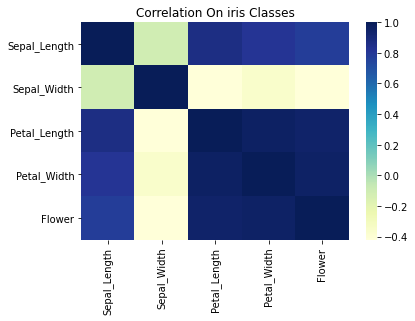

In [6]:
plt.figure(1)
ax = sns.heatmap(dataset.corr() , cmap="YlGnBu")
plt.title('Correlation On iris Classes')
plt.show()

## Spliting the dataset: train and test sets

Spliting the dataset: train and test sets

In [7]:
# Get a matrix X for the features
X = dataset.iloc[:,:-1]

# Get a vector y for the class
y = dataset.iloc[:, -1].values

# Import sklearn train_test_split
from sklearn.model_selection import train_test_split
# Splitt data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


## Creating the SVM model

Creating the SVM model

In [8]:
# Import sklearn SVM
from sklearn.svm import SVC

# Create the SVM model
classifier = SVC(kernel = 'linear', random_state = 0)

# Fit the model for the data
classifier.fit(X_train, y_train)

# Make the prediction
y_pred = classifier.predict(X_test)


## Check the acurracy of the model using the test set

Check the acurracy of the model using the test set

In [9]:
# Import sklearn confusion_matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)


[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


## Check the acurracy of the model using k-fold cross-validation

Check the acurracy of the model using k-fold cross-validation

In [10]:
# Import sklearn cross_val_score
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 98.18 %
Standard Deviation: 3.64 %


We have a 98% of accuracy wich is a very good model, 

The confusion matrix we can see that we have just only one misclassified data.
